In [1]:
import numpy as np
import pandas as pd
import altair as alt

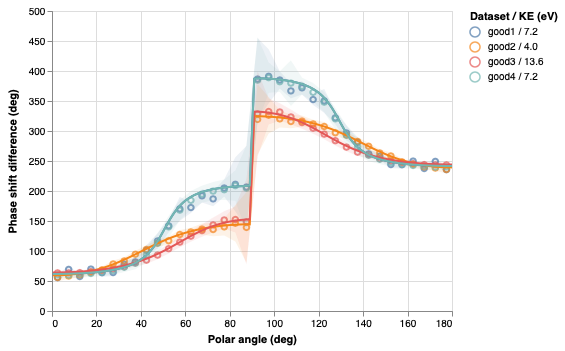

In [9]:
def _format(r: pd.Series):
    th = 24.58738880
    return "{} / {:.1f}".format(
        r["Dataset"] if "Dataset" in r.keys() else r["Target dataset"],
        2 * r["Photon energy (eV)"] - th,
    )

measu = pd.read_json("Data/Phase shifts - Measured.json")
measu["Dataset / KE (eV)"] = measu.apply(_format, axis=1)
measu["Polar ang (deg)"] = (measu["Polar ang fr (deg)"] + measu["Polar ang to (deg)"]) / 2
measu["Phase shift (deg)"] = measu["Phase shift (rad)"] / np.pi * 180
measu["Phase shift err (deg)"] = measu["Phase shift err (rad)"] / np.pi * 180
measu["Phase shift fr (deg)"] = measu["Phase shift (deg)"] - measu["Phase shift err (deg)"]
measu["Phase shift to (deg)"] = measu["Phase shift (deg)"] + measu["Phase shift err (deg)"]

simul = pd.read_json("Data/Phase shifts - TDCASSCF.json")
simul = simul[simul["Polar ang (deg)"] != 90]
simul["Dataset / KE (eV)"] = simul.apply(_format, axis=1)
simul["Phase shift (deg)"] = simul["Phase shift (rad)"] / np.pi * 180

base = alt.Chart(measu)
base.mark_point().encode(
    x=alt.X("Polar ang (deg)", axis=alt.Axis(title="Polar angle (deg)")),
    y=alt.Y("Phase shift (deg)", axis=alt.Axis(title="Phase shift difference (deg)")),
    color="Dataset / KE (eV)",
) + base.mark_area(opacity=0.1).encode(
    x="Polar ang (deg)",
    y="Phase shift fr (deg)",
    y2="Phase shift to (deg)",
    color="Dataset / KE (eV)",
) + alt.Chart(simul).mark_line().encode(
    x="Polar ang (deg)",
    y="Phase shift (deg)",
    color="Dataset / KE (eV)",
).interactive(bind_x=False)

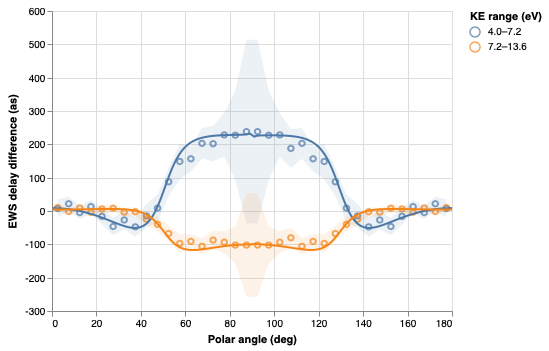

In [10]:
def _format(r: pd.Series):
    th = 24.58738880
    return "{:.1f}–{:.1f}".format(
        2 * r["Photon energy fr (eV)"] - th,
        2 * r["Photon energy to (eV)"] - th,
    )


measu = pd.read_json("Data/EWS delays - Measured.json")
measu["KE range (eV)"] = measu.apply(_format, axis=1)
measu["Polar ang (deg)"] = (measu["Polar ang fr (deg)"] + measu["Polar ang to (deg)"]) / 2
measu["EWS delay fr (as)"] = measu["EWS delay (as)"] - measu["EWS delay err (as)"]
measu["EWS delay to (as)"] = measu["EWS delay (as)"] + measu["EWS delay err (as)"]

simul = pd.read_json("Data/EWS delays - TDCASSCF.json")
simul = simul[simul["Polar ang (deg)"] != 90]
simul["KE range (eV)"] = simul.apply(_format, axis=1)

base = alt.Chart(measu)
base.mark_point().encode(
    x=alt.X("Polar ang (deg)", axis=alt.Axis(title="Polar angle (deg)")),
    y=alt.Y("EWS delay (as)", axis=alt.Axis(title="EWS delay difference (as)")),
    color="KE range (eV)",
) + base.mark_area(opacity=0.1).encode(
    x="Polar ang (deg)",
    y="EWS delay fr (as)",
    y2="EWS delay to (as)",
    color="KE range (eV)",
) + alt.Chart(simul).mark_line().encode(
    x="Polar ang (deg)",
    y="EWS delay (as)",
    color="KE range (eV)",
).interactive(bind_x=False)